## Introduction to Image Manipulation in R

With the rise of Smartphone and Social Media usage, Data shared across the Internet have become more of unstructured in the form of Text (Natural Language), Images and Videos. Hence it is important for us to be equipped with  sophisticated tools for such Data Processing and Data Manipulation. 

**ImageMagick** is one such tool and in fact, one of the most comprehensive open-source image processing library that supports over 200 image file formats (like: png, jpeg, tiff, pdf) and can display, convert and edit raster image and vector image files. Jeroen Ooms has been kind enough to develop an R package, `magick` that wraps the [ImageMagick ST](https://www.imagemagick.org/Magick++/STL.html) library. Thus, R-package `magick` tries to help R users in advanced Image processing (in R). 

### Installation on Windows and OSX

Since `magick` is available on CRAN, installing `magick` is as straightforward as installing any other R-package with `install.packages()`


In [ ]:
install.packages('magick')

Also, the development version of `magick` is available on `ropensci`'s github repo, hence could be installed with `install_github()` of `devtools` package. 

In [ ]:
devtools::install_github("ropensci/magick")

Please note that for installing from source (the development version from Github), The destination workstation requires RTools.exe to build the source and also note that the binary CRAN packages work out of the box and have most important features enabled, hence installing from CRAN is preferable. 

### Installation on Linux

On Linux you need to install the ImageMagick++ library: on Debian/Ubuntu this is called [libmagick++-dev](https://packages.debian.org/testing/libmagick++-dev):

In [ ]:
sudo apt-get install libmagick++-dev

On Fedora or CentOS/RHEL we need ImageMagick-c++-devel:

In [ ]:
sudo yum install ImageMagick-c++-devel

Once the installation is successful, the library `magick` can be loaded into the current R session using `library()` function.

In [ ]:
library(magick)

In [22]:
image_info(inp_img)

format,width,height,colorspace,filesize
PNG,734,479,sRGB,570656


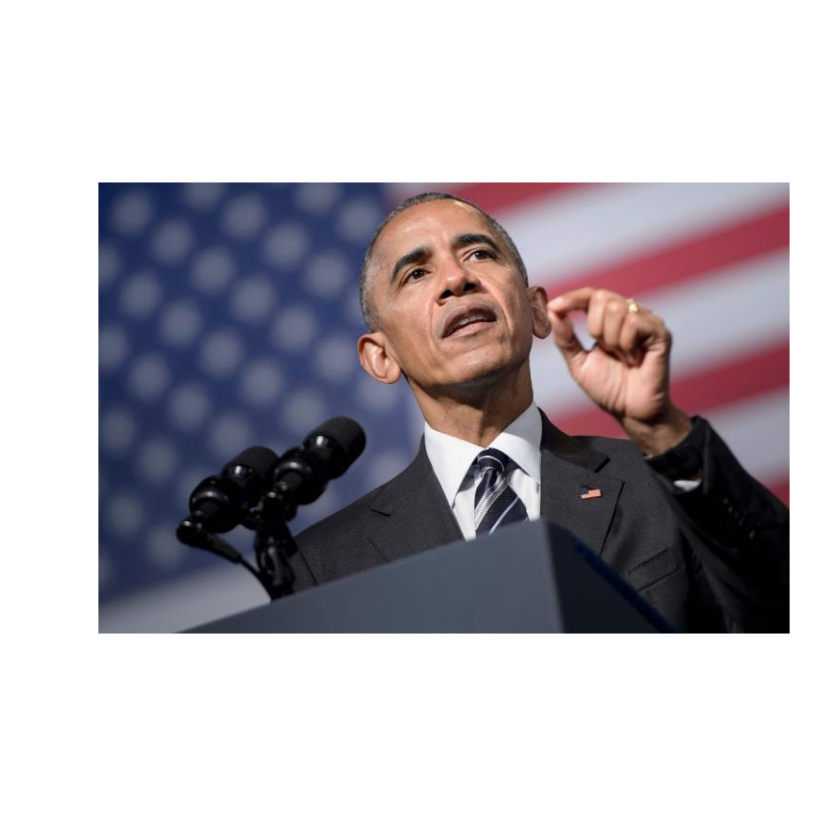

In [23]:
plot(inp_img)

In [27]:
cat <- image_read('C:\\Users\\SA31\\Pictures\\cat.jpg')

In [28]:
tiger <- image_read('C:\\Users\\SA31\\Pictures\\Medium_WW226367.jpg')

In [44]:
frames <- image_morph(c(cat, tiger), frames = 10)
image_animate(frames)

   format width height colorspace filesize
1     gif   256    240       sRGB        0
2     gif   256    240       sRGB        0
3     gif   256    240       sRGB        0
4     gif   256    240       sRGB        0
5     gif   256    240       sRGB        0
6     gif   256    240       sRGB        0
7     gif   256    240       sRGB        0
8     gif   256    240       sRGB        0
9     gif   256    240       sRGB        0
10    gif   256    240       sRGB        0
11    gif   256    240       sRGB        0
12    gif   256    240       sRGB        0